In [7]:
using Plots

In [1]:
function second_order_finite_difference(M::Matrix, i, j, Δx)
    return (M[i+1, j] - 2*M[i, j] + M[i-1, j])/Δx^2
end

function second_order_finite_difference(M::Matrix, i, j, Δx, Δy)
    return (M[i+1, j+1] - M[i+1, j-1] - M[i-1, j+1] + M[i-1, j-1])/(4*Δx*Δy)
end

function second_order_finite_difference_more_precise(M::Matrix, i, j, Δx)
    return (-M[i+2, j] + 16*M[i+1, j] - 30*M[i, j] + 16*M[i-1, j] - M[i-2, j])/(12*Δx^2)
end

function second_order_finite_difference_more_precise(M::Matrix, i, j, Δx, Δy)
    return (-M[i+2, j+2] + 8*M[i+2, j] - 8*M[i+2, j] + M[i+2, j-2] + 8*M[i+1, j+1] - 64*M[i+1, j] + 8*M[i+1, j-1] - 8*M[i, j+2] + 8*M[i, j-2] + 64*M[i, j] - 8*M[i-1, j+1] + 64*M[i-1, j] - 8*M[i-1, j-1] + M[i-2, j+2] - 8*M[i-2, j] + 8*M[i-2, j] - M[i-2, j-2])/(144*Δx*Δy)
end

## Estado estacionario

In [2]:
function boundary_conditions(A::Matrix,
                             b::Vector,
                             α::Real,
                             temp_bound::Real,
                             temp_init::Real,
                             boundary::String,
                             boundary_value::Real)
    """
    Input:
    --------

        -A: Matrix of the system of equations.
        -b: Vector of the system of equations.
        -\alpha: Thermal diffusivity (in m^2/s).
        -temp_bound: Initial temperature at the boundaries (in Celsius).
        -temp_init: Initial temperature of the surface (in Celsius).

        -boundary: Boundary condition. It can be 'Dirichlet' or 'Neumann'.
        -boundary_value: Value of the boundary condition (in Celsius).
    """

    # Number of points in the discretization
    N = size(A)[1]

    # Fill the matrix
    if boundary == "Dirichlet"
        A[1, 1] = 1
        A[N, N] = 1
        b[1] = temp_bound
        b[N] = temp_bound
    elseif boundary == "Neumann"
        A[1, 1] = -1
        A[1, 2] = 1
        A[N, N] = -1
        A[N, N-1] = 1
        b[1] = 0
        b[N] = 0
    end

    return A, b
end 



function build_matrix(L::Real,
                      T::Real,
                      N::Real,
                      α::Real,
                      temp_bound::Real,
                      temp_init::Real,
                      boundary::String,
                      boundary_value::Real)
    """
    Input:
    --------

        -L: Lenght of the surface (in meters).
        -T: Total time of the simulation (in seconds).
        -N: Number of points in the discretization, for both space and time.
        -\alpha: Thermal diffusivity (in m^2/s).
        -temp_bound: Initial temperature at the boundaries (in Celsius).
        -temp_init: Initial temperature of the surface (in Celsius).

        -boundary: Boundary condition. It can be 'Dirichlet' or 'Neumann'.
        -boundary_value: Value of the boundary condition (in Celsius).
    """

    # Discretization
    Δx = L/N
    Δt = T/N

    # Number of points in the discretization
    N = Int(N)

    # Build the matrix
    A = zeros(N,N)
    b = zeros(N)

    # Fill the matrix (this modifies in place the matrix A and the vector b)
    boundary_conditions(A, b, α, temp_bound, temp_init, boundary, boundary_value)

    # Fill the matrix (this modifies in place the matrix A and the vector b)
    for i in 2:N-1
        A[i, i-1] = α*Δt/Δx^2
        A[i, i] = -2*α*Δt/Δx^2 + 1
        A[i, i+1] = α*Δt/Δx^2
        b[i] = temp_init
    end

    return A, b
end


build_matrix (generic function with 1 method)

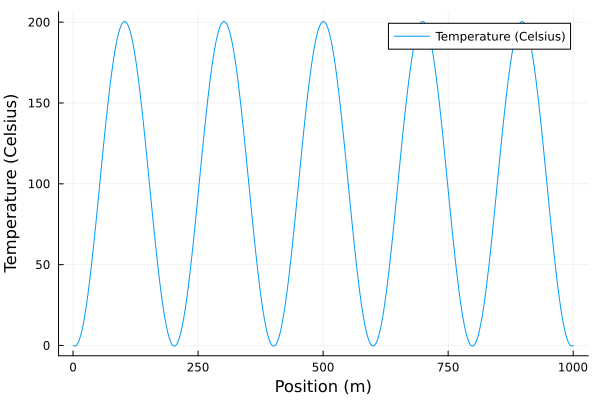

In [12]:
L = 10
T = 10
α = 10
N = 1000

temp_bound = 0
temp_init = 100

boundary = "Dirichlet"
boundary_value = 0

A, b = build_matrix(L, T, N, α, temp_bound, temp_init, boundary, boundary_value)

# Solve the system of equations
T = A\b

# Plot the solution
plot(T, label="Temperature (Celsius)", xlabel="Position (m)", ylabel="Temperature (Celsius)")

